In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-32.29731785750923 -45.241155131567695
3.3551936235941753 -62.91372704170149
5.7371533037860445 61.42573342955123
21.52228335562687 172.79529404557263
-20.818773744409754 44.89896576014567
-66.0040826597546 130.52905782836456
-40.51220507579232 -13.699973137770115
-0.016898223307080684 50.12005564123007
-48.884797419931594 -133.59845305731534
58.201571453736705 42.519294209491534
-69.89282328569392 102.42747354691414
88.08429969676234 -42.134939660162104
20.050398155532974 -179.9894006952587
-11.959653784800068 109.51792101576086
-12.184152334142368 -11.968181258555859
-26.031932510602665 98.60753351950308
-47.98323403862306 170.7841380927107
41.28024122462398 121.41362903994883
1.9250411675841406 42.37741622851422
49.17922666498967 145.7476208740465
15.910084751470976 46.40074283919873
-13.25620712431352 -167.75974097660804
44.09969838596652 88.04261126519208
-26.503473015201052 -166.73507735746094
72.61310044058098 98.27141076837358
-51.49122520715712 -65.93111017132146
88.6409868629

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | laguna
Processing Record 2 of Set 1 | boa vista
Processing Record 3 of Set 1 | bandarbeyla
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | morondava
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | mogadishu
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | galich
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | bambanglipuro
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | dalinghe
City not found. Skipping...
Processing Record 19 of Set 1 | dujuma
City not found. Skipping...
Processing Record 20 of Set 1 | poronaysk
Processing Record 21 of Set 1 | sayyan
Processing Record 22 o

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Laguna,38.4210,-121.4238,105.08,25,0,4.00,US,2022-07-16 21:23:10
1,Boa Vista,2.8197,-60.6733,89.58,55,40,6.91,BR,2022-07-16 21:25:44
2,Bandarbeyla,9.4942,50.8122,77.79,74,81,34.90,SO,2022-07-16 21:25:45
3,Butaritari,3.0707,172.7902,80.47,78,100,16.40,KI,2022-07-16 21:25:45
4,Morondava,-20.2833,44.2833,69.69,75,0,9.26,MG,2022-07-16 21:25:46
5,New Norfolk,-42.7826,147.0587,53.92,87,100,6.17,AU,2022-07-16 21:25:03
6,Jamestown,42.0970,-79.2353,81.01,43,0,8.99,US,2022-07-16 21:25:01
7,Mogadishu,2.0371,45.3438,76.10,82,42,19.42,SO,2022-07-16 21:25:46
8,Rikitea,-23.1203,-134.9692,73.35,76,100,16.02,PF,2022-07-16 21:23:11
9,Galich,58.3797,42.3475,57.25,75,97,2.91,RU,2022-07-16 21:25:46


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2022-07-16 21:23:10,38.4210,-121.4238,105.08,25,0,4.00
1,Boa Vista,BR,2022-07-16 21:25:44,2.8197,-60.6733,89.58,55,40,6.91
2,Bandarbeyla,SO,2022-07-16 21:25:45,9.4942,50.8122,77.79,74,81,34.90
3,Butaritari,KI,2022-07-16 21:25:45,3.0707,172.7902,80.47,78,100,16.40
4,Morondava,MG,2022-07-16 21:25:46,-20.2833,44.2833,69.69,75,0,9.26
5,New Norfolk,AU,2022-07-16 21:25:03,-42.7826,147.0587,53.92,87,100,6.17
6,Jamestown,US,2022-07-16 21:25:01,42.0970,-79.2353,81.01,43,0,8.99
7,Mogadishu,SO,2022-07-16 21:25:46,2.0371,45.3438,76.10,82,42,19.42
8,Rikitea,PF,2022-07-16 21:23:11,-23.1203,-134.9692,73.35,76,100,16.02
9,Galich,RU,2022-07-16 21:25:46,58.3797,42.3475,57.25,75,97,2.91


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

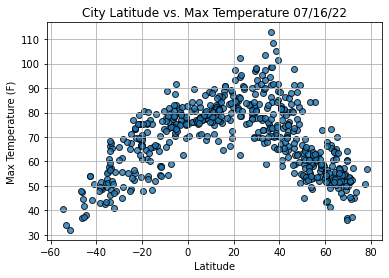

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

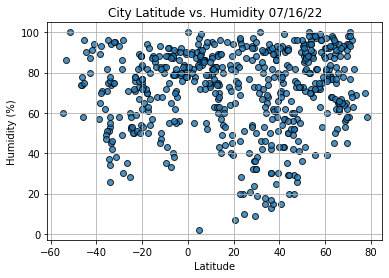

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

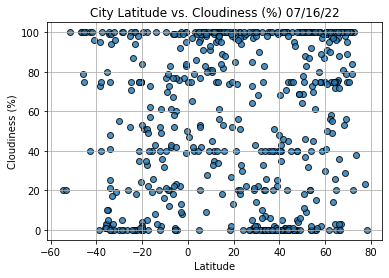

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

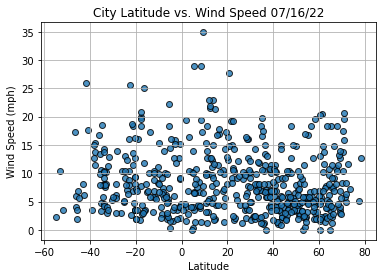

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()